In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the data

In [2]:
data = pd.read_csv(r"C:\Users\mdine\Downloads\Module_8_assignment\Exercise\churn_prediction.csv")
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [3]:
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

### Segregating variables - Dependent & Independent 

In [3]:
#seperating independent and dependent variables

data_x = data.drop(['churn'], axis=1)
data_y = data['churn']

#### Scaling the data

In [4]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(data_x,data_y, random_state = 56)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)

### Implementing Decesion Tree

Q1: __Fill the correct values to implement Decision Tree and find out accuracy, precision, and recall for Test Set__?

In [5]:
# Importing DecisionTreeClassifier and accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Creating an instance of DecisionTreeClassifier
tree = DecisionTreeClassifier()

# Fitting the model (assuming you have your training data and labels)
tree.fit(train_x, train_y)  # Replace X_train and y_train with your training data and labels

# Predicting over the Test Set
test_predict = tree.predict(test_x)  # Replace X_test with your test data

# Calculating accuracy score
accuracy = accuracy_score(test_y, test_predict)  # Replace y_test with your test labels

# Calculating precision score
precision = precision_score(test_y, test_predict)  # Replace y_test with your test labels

# Calculating recall score
recall = recall_score(test_y, test_predict)  # Replace y_test with your test labels

# Printing the scores
print('Test accuracy_score:', accuracy)
print('Test precision_score:', precision)
print('Test recall_score:', recall)


Test accuracy_score: 0.765452238535436
Test precision_score: 0.4256
Test recall_score: 0.48014440433212996


Q2: __Fill the correct values for getting Train and Test set accuracy by implementing Decision Tree with the depth range as 3-30?__

In [6]:
# Initialize a list of maximum depths to try
dp_list = [2, 4, 6, 8, 10]

# Initialize empty lists to store results
train = []
test = []

for depth in dp_list:
    # Create a Decision Tree classifier with the specified max_depth
    tree = DecisionTreeClassifier(max_depth=depth)
    
    # Fit the model on the training data
    tree.fit(train_x, train_y)  # Assuming you have train_x and train_y defined
    
    # Predictions on training data
    train_prediction = tree.predict(train_x)
    
    # Predictions on test data
    test_prediction = tree.predict(test_x)  # Assuming you have test_x defined
    
    # Calculate training and test accuracy
    train_acc = accuracy_score(train_y, train_prediction)
    test_acc = accuracy_score(test_y, test_prediction)  # Assuming you have test_y defined
    
    # Append accuracy scores to the lists
    train.append(train_acc)
    test.append(test_acc)

# Create a DataFrame to store the results
performance = pd.DataFrame({'max_depth': dp_list, 'Train_acc': train, 'Test_acc': test})

# Print the performance DataFrame
print(performance)


   max_depth  Train_acc  Test_acc
0          2   0.836737  0.831611
1          4   0.850634  0.842306
2          6   0.864834  0.836868
3          8   0.882417  0.831611
4         10   0.907976  0.830886


Q3: __Plot the train and test set accuracy after implementing Decision Tree with the depth range as 3-30?__

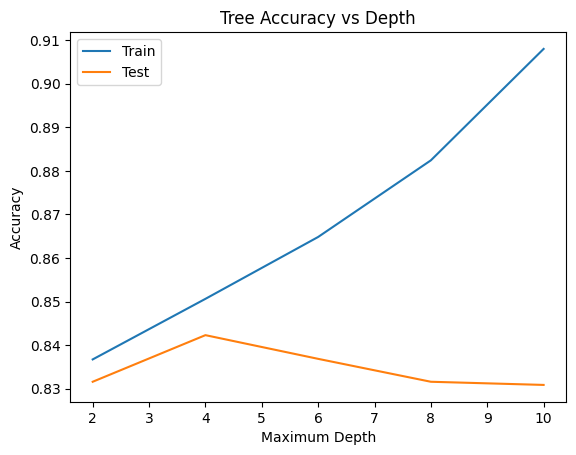

In [7]:
import matplotlib.pyplot as plt

# Assuming you have the 'performance' DataFrame with columns 'max_depth', 'Train_acc', and 'Test_acc'
plt.plot(performance['max_depth'], performance['Train_acc'], label='Train')
plt.plot(performance['max_depth'], performance['Test_acc'], label='Test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Maximum Depth')
plt.title('Tree Accuracy vs Depth')
plt.show()


Q4: __Implement Decision Tree with the mimimum sample leaf as 1-30 and plot the Train and Test set accuracy  ?__

In [0]:
sam_list = ??
train = []
test = []

for sam in sam_list:
    tree = ??
    tree.fit(??)
    prediction = ??
    trainpred = ??
    train_acc = ??
    test_acc = ??
    train.append(??)
    test.append(??)
    
performance = pd.DataFrame({'min_samples_leaf':??,'Train_acc':??,'Test_acc':??})

plt.plot(??,??, label='Train')
plt.plot(??,??, label='Test')
plt.legend()
plt.ylabel('accuracy')
plt.title('Tree accuracy vs sample leaf')
plt.show()



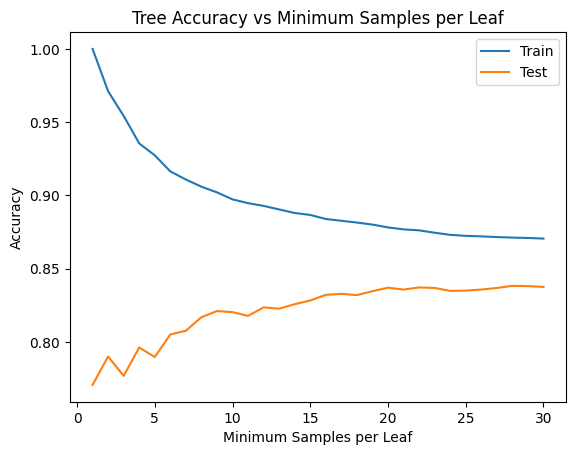

    min_samples_leaf  Train_acc  Test_acc
0                  1   1.000000  0.770709
1                  2   0.971118  0.790103
2                  3   0.954260  0.776871
3                  4   0.935529  0.796266
4                  5   0.927372  0.789741
5                  6   0.916435  0.805148
6                  7   0.910876  0.807685
7                  8   0.905982  0.816929
8                  9   0.902115  0.821098
9                 10   0.897341  0.820373
10                11   0.894743  0.817836
11                12   0.892870  0.823636
12                13   0.890453  0.822730
13                14   0.888036  0.825811
14                15   0.886707  0.828349
15                16   0.883927  0.832155
16                17   0.882719  0.832880
17                18   0.881511  0.831974
18                19   0.880121  0.834693
19                20   0.878187  0.837049
20                21   0.876858  0.835780
21                22   0.876193  0.837230
22                23   0.874562  0

In [8]:


# Initialize a list of min_samples_leaf values to try
sam_list = list(range(1, 31))

# Initialize empty lists to store results
train = []
test = []

for sam in sam_list:
    # Create a Decision Tree classifier with the specified min_samples_leaf
    tree = DecisionTreeClassifier(min_samples_leaf=sam)
    
    # Fit the model on the training data
    tree.fit(train_x, train_y)  # Assuming you have train_x and train_y defined
    
    # Predictions on training data
    train_prediction = tree.predict(train_x)
    
    # Predictions on test data
    test_prediction = tree.predict(test_x)  # Assuming you have test_x defined
    
    # Calculate training and test accuracy
    train_acc = accuracy_score(train_y, train_prediction)
    test_acc = accuracy_score(test_y, test_prediction)  # Assuming you have test_y defined
    
    # Append accuracy scores to the lists
    train.append(train_acc)
    test.append(test_acc)

# Create a DataFrame to store the results
performance = pd.DataFrame({'min_samples_leaf': sam_list, 'Train_acc': train, 'Test_acc': test})

# Plot the results
plt.plot(performance['min_samples_leaf'], performance['Train_acc'], label='Train')
plt.plot(performance['min_samples_leaf'], performance['Test_acc'], label='Test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Minimum Samples per Leaf')
plt.title('Tree Accuracy vs Minimum Samples per Leaf')
plt.show()

# Print the performance DataFrame
print(performance)


Q5: __Implement Decision Tree with the mimimum sample split as all even numbers between 2 and 40 and plot the Train and Test set accuracy  ?__

In [9]:
sam_list = ??
train = []
test = []

for sam in sam_list:
    tree = ??
    tree.fit(??)
    prediction = ??
    trainpred = ??
    train_acc = ??
    test_acc = ??
    train.append(??)
    test.append(??)
    
performance = pd.DataFrame({'min_samples_split':sam_list,'Train_acc':train,'Test_acc':test})

plt.plot(??,??, label='Train')
plt.plot(??,??, label='Test')
plt.legend()
plt.ylabel('accuracy')
plt.title('Tree accuracy vs sample split')
plt.show()




SyntaxError: unterminated string literal (detected at line 28) (3102641060.py, line 28)

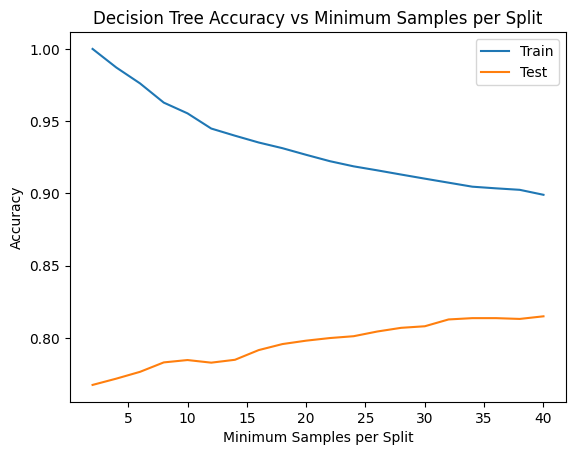

    min_samples_split  Train_acc  Test_acc
0                   2   1.000000  0.767446
1                   4   0.987130  0.771796
2                   6   0.976133  0.776509
3                   8   0.962840  0.783034
4                  10   0.955408  0.784666
5                  12   0.944894  0.782853
6                  14   0.939940  0.784847
7                  16   0.935227  0.791553
8                  18   0.931299  0.795722
9                  20   0.926707  0.798079
10                 22   0.922296  0.799891
11                 24   0.918731  0.801160
12                 26   0.915952  0.804423
13                 28   0.913051  0.806960
14                 30   0.910211  0.808048
15                 32   0.907432  0.812761
16                 34   0.904653  0.813667
17                 36   0.903505  0.813667
18                 38   0.902477  0.813123
19                 40   0.899033  0.814936


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize empty lists to store results
min_samples_split_values = list(range(2, 41, 2))  # All even numbers between 2 and 40
train_acc = []
test_acc = []

for min_samples_split in min_samples_split_values:
    # Create a Decision Tree classifier with the specified min_samples_split
    tree = DecisionTreeClassifier(min_samples_split=min_samples_split)
    
    # Fit the model on the training data
    tree.fit(train_x, train_y)  # Assuming you have train_x and train_y defined
    
    # Predictions on training data
    train_prediction = tree.predict(train_x)
    
    # Predictions on test data
    test_prediction = tree.predict(test_x)  # Assuming you have test_x defined
    
    # Calculate training and test accuracy
    train_accuracy = accuracy_score(train_y, train_prediction)
    test_accuracy = accuracy_score(test_y, test_prediction)  # Assuming you have test_y defined
    
    # Append accuracy scores to the lists
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)

# Create a DataFrame to store the results
performance = pd.DataFrame({'min_samples_split': min_samples_split_values,'Train_acc': train_acc, 'Test_acc': test_acc})

# Plot the results
plt.plot(performance['min_samples_split'], performance['Train_acc'], label='Train')
plt.plot(performance['min_samples_split'], performance['Test_acc'], label='Test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Minimum Samples per Split')
plt.title('Decision Tree Accuracy vs Minimum Samples per Split')
plt.show()

# Print the performance DataFrame
print(performance)


Q6: __Implement a cross validation Decision Tree model with stratified 5 folds and make predictions for test dataset.__

In [11]:
# a cross validation Decision Tree model with stratified 5 folds and make predictions for test dataset.

from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize variables
i = 1
kf = StratifiedKFold(n_splits=5, random_state=3, shuffle=True)
accuracy_list = []

# Loop through each fold
for train_index, test_index in kf.split(data_x, data_y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    
    # Split the data into training and validation sets
    xtr, xvl = data_x.iloc[train_index], data_x.iloc[test_index]
    ytr, yvl = data_y.iloc[train_index], data_y.iloc[test_index]
    
    # Create and train the Decision Tree model
    model = DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    
    # Make predictions on the validation set
    pred_test = model.predict(xvl)
    
    # Calculate and store the accuracy score for this fold
    score = accuracy_score(yvl, pred_test)
    accuracy_list.append(score)
    print('accuracy_score', score)
    
    i += 1

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(accuracy_list)
print("Mean accuracy across the folds is:", mean_accuracy)
 
    


1 of kfold 5
accuracy_score 0.771635704576348

2 of kfold 5
accuracy_score 0.7673312188491165

3 of kfold 5
accuracy_score 0.7795150691139814

4 of kfold 5
accuracy_score 0.7799682755495128

5 of kfold 5
accuracy_score 0.7697711307500567
Mean accuracy across the folds is: 0.7736442797678029
